In [40]:
from land_cover import load
from land_cover.plotting import plot_basemap
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import img_tiles
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
shp_out = '/Volumes/metis/ABOVE3/Tom/Selected_PLD_Lakes_2024-10-21/added_PLD/Efflux_PLD_WBD.shp'

In [2]:
df = pd.read_excel('/Volumes/metis/ABOVE3/Tom/PrelimLakeMatchupData_2024-10-21.xlsx', sheet_name='Measurements')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8714 entries, 0 to 8713
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OID_           8714 non-null   int64  
 1   lat            6245 non-null   float64
 2   long           6245 non-null   float64
 3   Reference      6245 non-null   object 
 4   pco2uatm       6245 non-null   float64
 5   A              6245 non-null   float64
 6   B              6245 non-null   float64
 7   C              6245 non-null   float64
 8   Lat_DD         891 non-null    float64
 9   Lon_DD         891 non-null    float64
 10  AvgOfTempC     891 non-null    float64
 11  AvgOfpH        891 non-null    float64
 12  AvgOfALKum     891 non-null    float64
 13  AvgOfCO2_o     891 non-null    float64
 14  StDevOfCO2     891 non-null    float64
 15  AvgOfpCO2      891 non-null    float64
 16  StDevOfpCO     891 non-null    float64
 17  Name.1         1578 non-null   object 
 18  PopupInf

In [3]:
df_no_geom = df[df['lake_id'].isna()].query("Name == 'EffluxLakes'")
df_no_geom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 7266 to 7575
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OID_           310 non-null    int64  
 1   lat            0 non-null      float64
 2   long           0 non-null      float64
 3   Reference      0 non-null      object 
 4   pco2uatm       0 non-null      float64
 5   A              0 non-null      float64
 6   B              0 non-null      float64
 7   C              0 non-null      float64
 8   Lat_DD         310 non-null    float64
 9   Lon_DD         310 non-null    float64
 10  AvgOfTempC     310 non-null    float64
 11  AvgOfpH        310 non-null    float64
 12  AvgOfALKum     310 non-null    float64
 13  AvgOfCO2_o     310 non-null    float64
 14  StDevOfCO2     310 non-null    float64
 15  AvgOfpCO2      310 non-null    float64
 16  StDevOfpCO     310 non-null    float64
 17  Name.1         0 non-null      object 
 18  PopupInfo  

In [4]:
gdf_no_geom = gpd.GeoDataFrame(df_no_geom, geometry=gpd.points_from_xy(df_no_geom['Lon_DD'], df_no_geom['Lat_DD']), crs='EPSG:4326')


In [5]:
gdf_wbd = load.loadWBD()

In [6]:
# Reproject both GeoDataFrames to ESRI:102001
gdf_no_geom = gdf_no_geom.to_crs('ESRI:102001')
gdf_wbd = gdf_wbd.to_crs('ESRI:102001')

# Buffer gdf_no_geom by 80 meters
gdf_no_geom['geometry'] = gdf_no_geom.buffer(80)

# Perform the spatial join (default is 'inner' join based on 'intersects')
gdf_joined_wbd = gpd.sjoin(gdf_wbd, gdf_no_geom, how="inner")

# View the result
print(gdf_joined_wbd.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 62 entries, 133896 to 812561
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       62 non-null     float64 
 1   ID             62 non-null     float64 
 2   GRIDCODE       62 non-null     float64 
 3   Area           62 non-null     float64 
 4   SI             62 non-null     float64 
 5   Shape_Leng     62 non-null     float64 
 6   Shape_Area     62 non-null     float64 
 7   PA             62 non-null     float64 
 8   PA_Circle      62 non-null     float64 
 9   Perimeter      62 non-null     float64 
 10  river          3 non-null      float64 
 11  on_glacier     0 non-null      float64 
 12  geometry       62 non-null     geometry
 13  index_right    62 non-null     int64   
 14  OID_           62 non-null     int64   
 15  lat            0 non-null      float64 
 16  long           0 non-null      float64 
 17  Reference      0 non-null

<Axes: >

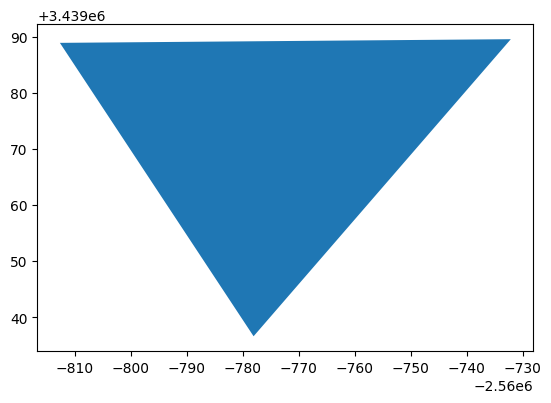

In [7]:
gdf_joined_wbd[:1].plot()


In [8]:
## Remove dups
gdf_joined_wbd = gdf_joined_wbd.groupby('OBJECTID').first().reset_index()
gdf_joined_wbd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       60 non-null     float64 
 1   ID             60 non-null     float64 
 2   GRIDCODE       60 non-null     float64 
 3   Area           60 non-null     float64 
 4   SI             60 non-null     float64 
 5   Shape_Leng     60 non-null     float64 
 6   Shape_Area     60 non-null     float64 
 7   PA             60 non-null     float64 
 8   PA_Circle      60 non-null     float64 
 9   Perimeter      60 non-null     float64 
 10  river          3 non-null      float64 
 11  on_glacier     0 non-null      float64 
 12  geometry       60 non-null     geometry
 13  index_right    60 non-null     int64   
 14  OID_           60 non-null     int64   
 15  lat            0 non-null      float64 
 16  long           0 non-null      float64 
 17  Reference      0 non-null    

In [10]:
gdf_joined_wbd.head()

,OBJECTID,ID,GRIDCODE,Area,SI,Shape_Leng,Shape_Area,PA,PA_Circle,Perimeter,...,AvgOfCO2_o,StDevOfCO2,AvgOfpCO2,StDevOfpCO,Name.1,PopupInfo,LabelID,Name,lake_id,LitReviewInfo
0,2002061.0,919878.0,1.0,0.002056,1.306532,0.002964,3.535318e-07,102.153976,78.187119,0.209988,...,8.979405,0.0,173.721373,0.0,None,None,NaN,EffluxLakes,NaN,0
1,2002781.0,938004.0,1.0,0.007230,1.377205,0.005352,1.241397e-06,57.416943,41.690914,0.415114,...,610.705734,0.0,8715.373549,0.0,None,None,NaN,EffluxLakes,NaN,0
2,2018213.0,37677.0,1.0,0.001782,1.468400,0.002856,2.952863e-07,123.304466,83.971970,0.219746,...,48.978071,0.0,966.702283,0.0,None,None,NaN,EffluxLakes,NaN,0
3,2019929.0,45342.0,1.0,0.000951,1.289364,0.001920,1.571984e-07,148.241287,114.972435,0.140926,...,300.773631,0.0,6155.211912,0.0,None,None,NaN,EffluxLakes,NaN,0
4,2021727.0,55610.0,1.0,0.002277,1.159875,0.002690,3.753026e-07,86.168533,74.291237,0.196193,...,79.463304,0.0,1282.321847,0.0,None,None,NaN,EffluxLakes,NaN,0


In [14]:
gdf_efflux = load.loadEffluxShp()

In [41]:
gdf_efflux  = pd.concat([gdf_efflux.to_crs("ESRI:102001"), gdf_joined_wbd], ignore_index=True)

/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/geopandas/array.py:1638: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as Canada_Albers_Equal_Area_Conic (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


In [42]:
gdf_efflux.crs

<Projected CRS: ESRI:102001>
Name: Canada_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada_Albers_Equal_Area_Conic
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [23]:
dir(gdf_efflux.crs)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_crs',
 '_local',
 'area_of_use',
 'axis_info',
 'coordinate_operation',
 'coordinate_system',
 'cs_to_cf',
 'datum',
 'ellipsoid',
 'equals',
 'from_authority',
 'from_cf',
 'from_dict',
 'from_epsg',
 'from_json',
 'from_json_dict',
 'from_proj4',
 'from_string',
 'from_user_input',
 'from_wkt',
 'geodetic_crs',
 'get_geod',
 'get_non_deprecated',
 'is_bound',
 'is_compound',
 'is_deprecated',
 'is_derived',
 'is_engineering',
 'is_exact_same',
 'is_geocentric',
 'is_geographic',
 'is_projected',
 'is_vertical',
 'list_authority',
 'name',
 'prime_meridian',
 'remarks',
 'scope',
 'sou

In [26]:
gdf_efflux.crs.to_dict()

/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


{'proj': 'aea',
 'lat_0': 40,
 'lon_0': -96,
 'lat_1': 50,
 'lat_2': 70,
 'x_0': 0,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'm',
 'no_defs': None,
 'type': 'crs'}

In [34]:
gdf_efflux.crs.srs

'ESRI:102001'

In [28]:
gdf_efflux.crs.to_wkt()

'PROJCRS["Canada_Albers_Equal_Area_Conic",BASEGEOGCRS["NAD83",DATUM["North American Datum 1983",ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4269]],CONVERSION["Canada_Albers_Equal_Area_Conic",METHOD["Albers Equal Area",ID["EPSG",9822]],PARAMETER["Latitude of false origin",40,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8821]],PARAMETER["Longitude of false origin",-96,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8822]],PARAMETER["Latitude of 1st standard parallel",50,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8823]],PARAMETER["Latitude of 2nd standard parallel",70,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8824]],PARAMETER["Easting at false origin",0,LENGTHUNIT["metre",1],ID["EPSG",8826]],PARAMETER["Northing at false origin",0,LENGTHUNIT["metre",1],ID["EPSG",8827]]],CS[Cartesian,2],AXIS["(E)",east,ORDER[1],LENGTHUNIT["metre",1]],AXIS["(N)",north,ORDER[2],LENGTHUNIT["metre",1]

In [38]:
# load.loadEffluxShp().crs.to_dict()['proj']
load.loadEffluxShp().crs.name

'WGS 84'

Example maps

In [49]:
from pyproj.crs.crs import CRS
CRS.from_authority("ESRI", 102001).srs


'ESRI:102001'

In [56]:
gdf_efflux.crs.name

'Canada_Albers_Equal_Area_Conic'

/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


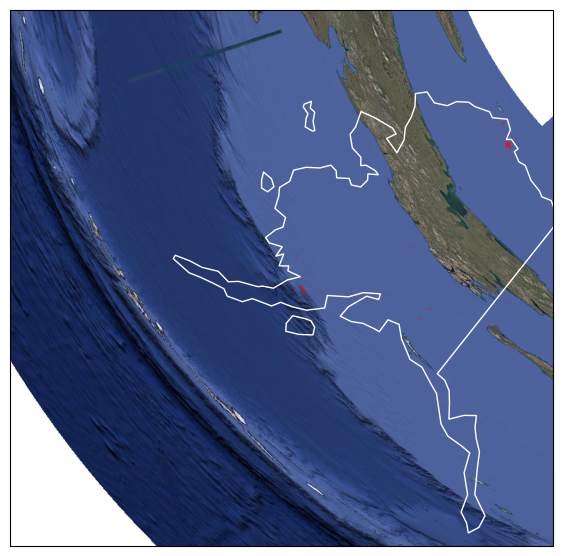

In [57]:
plot_basemap(gdf_efflux, CRS.from_authority("ESRI", 102001))

In [64]:
from land_cover.plotting import _crs2ccrs, _cartopy_albers

In [65]:
_cartopy_albers(CRS.from_authority("ESRI", 102001))

/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


<Projected CRS: +proj=aea +ellps=WGS84 +lon_0=-96 +lat_0=40 +x_0=0 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Albers Equal Area
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


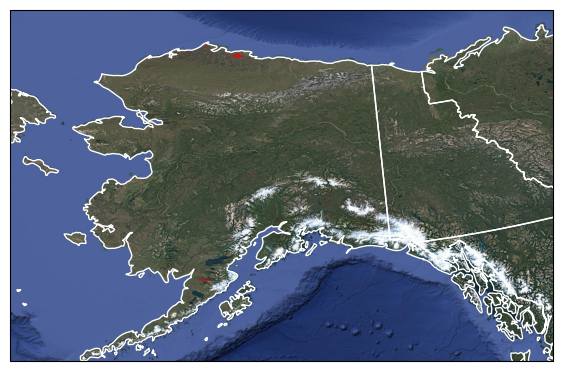

In [67]:
# Set up the plot with a specific Cartopy CRS for Alaska
fig, ax = plt.subplots(
    figsize=(7, 10), 
    subplot_kw={
    # 'projection': 'ESRI:102001'})
    'projection': ccrs.AlbersEqualArea(central_longitude=-152, central_latitude=63)})
    # 'projection': _cartopy_albers(CRS.from_authority("ESRI", 102001))})
        # 'projection': ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=40)})

# Zoom into Alaska
ax.set_extent([-170, -130, 54, 72], crs=ccrs.PlateCarree())

# Add Google Satellite imagery
ax.add_image(img_tiles.GoogleTiles(style='satellite'), 6)

# Add state outlines using Cartopy's features
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='white')

# Plot the GeoDataFrames
a=0.7
gdf_efflux.plot(ax=ax, color='red', markersize=5,
                   transform=_crs2ccrs(CRS.from_authority("ESRI", 102001)), alpha=a, label='Efflux lakes')

# ax.legend(title='Legend', loc='upper right')
plt.show()

Write out

In [69]:
gdf_efflux.to_file(shp_out)

/var/folders/rv/sn0kln2103b9fs4xl56n3w7w0000gn/T/ipykernel_33981/3565856424.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_efflux.to_file(shp_out)
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'LitReviewInfo' to 'LitReviewI'
  ogr_write(
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 3550000082 of field lake_id of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/Users/ekyzivat/mambaforge/envs/landcover/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 3550000112 of field lake_id of feature 1 not success